In [66]:
# Добавляем каталог для поиска модулей (Здесь необходимо указать свой абсолютный путь к корневому каталогу)
import sys
#sys.path.append(jp.joinpath('C:\\Users\\Alex_DS\\Datascientist\\', 'ECG_new_forward'))
sys.path.append('C:\\Users\\Alex_DS\\Datascientist\\ECG_new_forward')


import Pipes.train_test_split_scaled as ttss
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
plt.rcParams["figure.figsize"] = (18,6)

In [31]:
# Рисовалка кривых обучения

def draw_curves (history, los, metric):
    
    acc = history.history[metric]
    val_acc = history.history['val_'+metric]
    loss = history.history[los]
    val_loss = history.history['val_'+los]

    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, 'bo', label = 'Training '+metric)
    plt.plot(epochs, val_acc, 'b', label = 'Validation '+metric)
    plt.title('Training and Validation '+metric)
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

## Нейросеть

In [32]:
X_t_train, Y_train, X_t_test, Y_test = ttss.read_split()
#X = pd.read_csv('X.csv', index_col = 'Unnamed: 0')
#Y = pd.read_csv('Y.csv', index_col = 'Unnamed: 0')

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [33]:
#sc = StandardScaler()

#X_t_train = sc.fit_transform(X_train)
#X_t_test = sc.transform(X_test)

In [60]:
#  Структура модели
model = models.Sequential()

model.add(layers.Dense(32, activation="relu", input_shape = (X_t_train.shape[1],)))
#model.add(layers.Dropout(0.05))
model.add(layers.Dense(16, activation="relu"))#, input_shape = (X_t_train.shape[1],)))
#model.add(layers.Dropout(0.05))
model.add(layers.Dense(8, activation="relu")) #input_shape = (X_t_train.shape[1],)))
#model.add(layers.Dropout(0.05))
#model.add(GlobalAveragePooling1D())
model.add(layers.Dense(8, activation="softmax", kernel_regularizer = regularizers.l2(0.001)))#, input_shape = (X_t_train.shape[1],), #kernel_regularizer = regularizers.l1(0.1)
                       ##))

In [61]:
# Компиляция модели
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [62]:
X_t_train.shape, Y_train.shape

((8492, 13), (8492, 1))

In [63]:
# Обучение модели
history = model.fit(X_t_train, Y_train, validation_data = (X_t_test, Y_test), epochs = 120, batch_size = 16) #epochs = 120

Epoch 1/120
531/531 [==============================] - 2s 2ms/step - loss: 1.3447 - accuracy: 0.5440 - val_loss: 1.0290 - val_accuracy: 0.6232
Epoch 2/120
531/531 [==============================] - 2s 3ms/step - loss: 0.9156 - accuracy: 0.6936 - val_loss: 0.8315 - val_accuracy: 0.7358
Epoch 3/120
531/531 [==============================] - 2s 4ms/step - loss: 0.7423 - accuracy: 0.7578 - val_loss: 0.6972 - val_accuracy: 0.7593
Epoch 4/120
531/531 [==============================] - 1s 3ms/step - loss: 0.6565 - accuracy: 0.7793 - val_loss: 0.6394 - val_accuracy: 0.7857
Epoch 5/120
531/531 [==============================] - 1s 2ms/step - loss: 0.6214 - accuracy: 0.7882 - val_loss: 0.6113 - val_accuracy: 0.7993
Epoch 6/120
531/531 [==============================] - 1s 2ms/step - loss: 0.5990 - accuracy: 0.7993 - val_loss: 0.5986 - val_accuracy: 0.8036
Epoch 7/120
531/531 [==============================] - 1s 3ms/step - loss: 0.5860 - accuracy: 0.8023 - val_loss: 0.5841 - val_accuracy: 0.8012

Epoch 58/120
531/531 [==============================] - 1s 2ms/step - loss: 0.4158 - accuracy: 0.8668 - val_loss: 0.4231 - val_accuracy: 0.8724
Epoch 59/120
531/531 [==============================] - 2s 3ms/step - loss: 0.4113 - accuracy: 0.8688 - val_loss: 0.4248 - val_accuracy: 0.8714
Epoch 60/120
531/531 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.8666 - val_loss: 0.4327 - val_accuracy: 0.8672
Epoch 61/120
531/531 [==============================] - 1s 2ms/step - loss: 0.4086 - accuracy: 0.8687 - val_loss: 0.4155 - val_accuracy: 0.8714
Epoch 62/120
531/531 [==============================] - 1s 2ms/step - loss: 0.4111 - accuracy: 0.8683 - val_loss: 0.4104 - val_accuracy: 0.8775
Epoch 63/120
531/531 [==============================] - 1s 2ms/step - loss: 0.4071 - accuracy: 0.8720 - val_loss: 0.4133 - val_accuracy: 0.8728
Epoch 64/120
531/531 [==============================] - 1s 2ms/step - loss: 0.4070 - accuracy: 0.8733 - val_loss: 0.4290 - val_accuracy:

Epoch 115/120
531/531 [==============================] - 2s 3ms/step - loss: 0.3755 - accuracy: 0.8821 - val_loss: 0.3997 - val_accuracy: 0.8775
Epoch 116/120
531/531 [==============================] - 1s 3ms/step - loss: 0.3744 - accuracy: 0.8825 - val_loss: 0.3965 - val_accuracy: 0.8851
Epoch 117/120
531/531 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8806 - val_loss: 0.4127 - val_accuracy: 0.8775
Epoch 118/120
531/531 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8801 - val_loss: 0.4075 - val_accuracy: 0.8742
Epoch 119/120
531/531 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8809 - val_loss: 0.4130 - val_accuracy: 0.8785
Epoch 120/120
531/531 [==============================] - 1s 2ms/step - loss: 0.3762 - accuracy: 0.8819 - val_loss: 0.3976 - val_accuracy: 0.8832


In [64]:
# Количество параметров моделив каждом слое
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                448       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 8)                 72        
                                                                 
Total params: 1,184
Trainable params: 1,184
Non-trainable params: 0
_________________________________________________________________


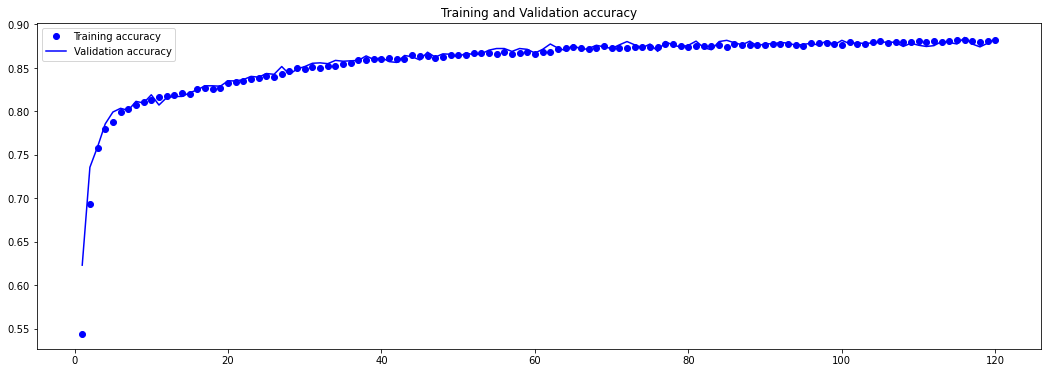

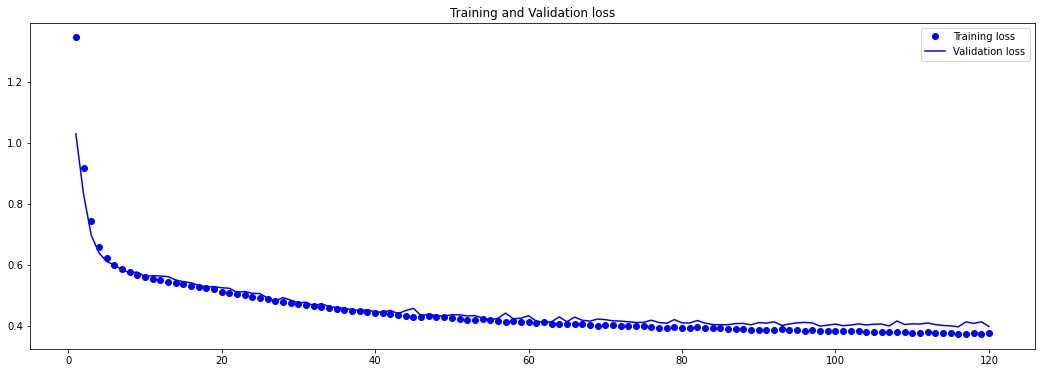

In [67]:
draw_curves(history, 'loss', 'accuracy')

In [68]:
# Прогнозы модели
predict = np.argmax(model.predict(X_t_test), axis=-1)

67/67 [==============================] - 0s 1ms/step


In [69]:
confusion_matrix(Y_test, predict)

array([[773,   1,   4,   0,   0,   0,   0,   0],
       [  2, 347,   3,   4,   0,   0,   9,   0],
       [  7,  14, 311,  11,  12,   1,   0,   0],
       [  1,   1,   8, 298,   3,   3,   0,   0],
       [  0,   0,   8,   4, 103,   2,   0,   0],
       [  1,   5,  51,  12,  15,   3,   2,   0],
       [  1,  35,   2,   2,   0,   0,  40,   0],
       [  0,   7,   6,   8,   2,   0,   1,   0]], dtype=int64)

In [70]:
f1_score(Y_test, predict, average = 'micro')

0.8831841733396137

In [71]:
# Сохранение модели
model.save('neuron_net_clf.h5')